In [1]:
import spacy

In [2]:
nlp = spacy.load("de_core_news_md")

In [3]:
from collections import defaultdict
def get_pos_tags(text, nlp):
    doc = nlp(text)
    pos_counts = defaultdict(int)
    for token in doc:
        pos_counts[token.pos_] += 1

    verb_count = pos_counts["VERB"]
    token_count = len([token for token in doc if not token.is_punct])
    return verb_count/token_count

def readiness_to_action(text, nlp):
    doc = nlp(text)
    pos_counts = defaultdict(int)
    for token in doc:
        pos_counts[token.pos_] += 1

    noun_count = pos_counts["NOUN"] + pos_counts["PROPN"] + pos_counts["PRON"]
    verb_count = pos_counts["VERB"]+ pos_counts["AUX"]
    return verb_count/noun_count

def pronominalisation_index(text, nlp):
    doc = nlp(text)
    pos_counts = defaultdict(int)
    for token in doc:
        pos_counts[token.pos_] += 1

    
    return pos_counts["PRON"] / (pos_counts["PRON"] + pos_counts["NOUN"] + pos_counts["PROPN"])

In [4]:
get_pos_tags("Kannst du mir ein Brötchen backen? Du bin traurig!", nlp)

0.2222222222222222

In [5]:
from collections import Counter
import re
def ichiness(text):
    text = text.lower()
    doc = nlp(text)
    
    words = [token.text for token in doc if  token.is_punct != True]
    if len(words) < 1: 
        return 0
    counter = Counter(words)
    ich_share = counter["ich"]/len(words)
    
    return ich_share

def janess(text):
    text = text.lower()
    doc = nlp(text)    
    words = [token.text for token in doc if  token.is_punct != True]
    if len(words) < 1: 
        return 0
    counter = Counter(words)
    ich_share = counter["ja"]/len(words)
    return ich_share

def neinness(text):
    text = text.lower()
    doc = nlp(text)

    words = [token.text for token in doc if  token.is_punct != True]
    if len(words) < 1: 
        return 0
    counter = Counter(words)
    ich_share = counter["nein"]/len(words)
    return ich_share

def soft_preprocess(text):
    text = text.lower()
    text = re.sub(r"\(.*?\)|\[.*?\]", "", text)
    return text

def hard_preprocessed(text):
    text = text.lower()
    text = re.sub(r"\(.*?\)|\[.*?\]", "", text)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha ]
    return ' '.join(lemmas)

In [6]:
import pandas as pd

In [7]:
all_data_raw = pd.read_csv("src/exported_20201228.csv")
all_data_raw

,Unnamed: 0,group,paragraph_position,couple_id,speaker,raw_text,gender,is_depressive,is_paragraph
0,0,1,0,105,A,Jetzt sollen wir uns unterhalten?,M,False,True
1,1,1,1,105,B,"Genau. Also ich fand es richtig schön, dass wi...",W,True,True
2,2,1,2,105,A,"Das war ja gut gemacht, ich hab dich so lange ...",M,False,True
3,3,1,3,105,B,"Ohne es wirklich zu wollen, eigentlich. (unv. ...",W,True,True
4,4,1,4,105,A,Ich konnte es mir ja eh nicht vorstellen bevor...,M,False,True
...,...,...,...,...,...,...,...,...,...
753,804,0,103,87,B,"Ja, sich nur über positives zu unterhalten.",W,False,True
754,805,0,104,87,A,"Ja, stimmt. Negative Sachen wirft man sich oft...",M,False,True
755,807,0,106,87,A,"Du bist witzig, du kannst witzig sein. Ich mag...",M,False,True
756,808,0,107,87,B,Danke.,W,False,True


In [8]:

all_data_raw.dropna(inplace=True)
grouped_by_speaker_couple = all_data_raw.groupby(by=["couple_id", "speaker"]).agg({"raw_text": " ".join , "is_depressive": pd.Series.mode })
# grouped_by_speaker_couple = all_data_raw.groupby(by=["Unnamed: 0"]).agg({"raw_text": " ".join , "is_depressive": pd.Series.mode })
grouped_by_speaker_couple["soft_preprocessed"] = grouped_by_speaker_couple["raw_text"].apply(soft_preprocess)
grouped_by_speaker_couple["hard_preprocessed"] = grouped_by_speaker_couple["raw_text"].apply(hard_preprocessed)
grouped_by_speaker_couple["ichiness"] = grouped_by_speaker_couple["soft_preprocessed"].apply(ichiness)
grouped_by_speaker_couple["janess"] = grouped_by_speaker_couple["soft_preprocessed"].apply(janess)
grouped_by_speaker_couple["neinness"] = grouped_by_speaker_couple["soft_preprocessed"].apply(neinness)
# grouped_by_speaker_couple["aggressiveness"] = grouped_by_speaker_couple["soft_preprocessed"].apply(get_pos_tags, nlp=nlp)
# grouped_by_speaker_couple["readiness_to_action"] = grouped_by_speaker_couple["soft_preprocessed"].apply(readiness_to_action, nlp=nlp)
# grouped_by_speaker_couple["pronominalisation_index"] = grouped_by_speaker_couple["soft_preprocessed"].apply(pronominalisation_index, nlp=nlp)
grouped_by_speaker_couple

raw_text  \
couple_id speaker                                                      
27        A        Positive Gefühle. (A zieht seine Brille auf) Z...   
          B        Ja, positive Gefühle können bei mir auslösen w...   
29        A        Gut, fangen wir mal an.  Emotionale Offenheit ...   
          B        Ja, fang du mal an. Da weiß ich jetzt gar nich...   
47        A        Erzähl mir was. Ja das find ich auch gut, muss...   
          B        Also wir müssen die Fragen jetzt nicht alle so...   
58        A        Soll ich anfangen? Ich hab mir was überlegt. A...   
          B        Erzähl Ne, passt schon. Äh das war… das hat mi...   
60        A        Wenn´s positiv geht, dann wird es nicht laut, ...   
          B        Allerdings.  Danke. Ich denke du könntest das ...   
81        A        Ich dachte wir reden darüber wie wir die erste...   
          B        Erste Wohnung?  Ja. [SO ganz unauffällig]. Du ...   
87        A        Wie lang? Okay, dann fang mal an. Mhm. Dass du...   
          B        10 Minuten Amm… Ich fand es schön als du geste...   
105       A         Jetzt sollen wir uns unterhalten? Das war ja ...   
          B        Genau. Also ich fand es richtig schön, dass wi...   
138       A        (unv. 2 s.) Könntest du dir denn vorstellen, d...   
          B        Am Ammersee. Dann machen wir es so. Da, wo man...   
182       A        (unv. 00:02) Du solltest doch nicht nachgucken...   
          B        Hm? (lacht) Sag nur ``Ich darf den schönen Mäd...   

                   is_depressive  \
couple_id speaker                  
27        A                False   
          B                 True   
29        A                False   
          B                False   
47        A                False   
          B                 True   
58        A                False   
          B                False   
60        A                 True   
          B                False   
81        A                False   
          B                False   
87        A                False   
          B                False   
105       A                False   
          B                 True   
138       A                False   
          B                 True   
182       A                False   
          B                False   

                                                   soft_preprocessed  \
couple_id speaker                                                      
27        A        positive gefühle.  zuwendung, das ist ja, zuwe...   
          B        ja, positive gefühle können bei mir auslösen w...   
29        A        gut, fangen wir mal an.  emotionale offenheit ...   
          B        ja, fang du mal an. da weiß ich jetzt gar nich...   
47        A        erzähl mir was. ja das find ich auch gut, muss...   
          B        also wir müssen die fragen jetzt nicht alle so...   
58        A        soll ich anfangen? ich hab mir was überlegt. a...   
          B        erzähl ne, passt schon. äh das war… das hat mi...   
60        A        wenn´s positiv geht, dann wird es nicht laut, ...   
          B        allerdings.  danke. ich denke du könntest das ...   
81        A        ich dachte wir reden darüber wie wir die erste...   
          B        erste wohnung?  ja. . du kannst auch gerne auf...   
87        A        wie lang? okay, dann fang mal an. mhm. dass du...   
          B        10 minuten amm… ich fand es schön als du geste...   
105       A         jetzt sollen wir uns unterhalten? das war ja ...   
          B        genau. also ich fand es richtig schön, dass wi...   
138       A         könntest du dir denn vorstellen, dass wir da ...   
          B        am ammersee. dann machen wir es so. da, wo man...   
182       A         du solltest doch nicht nachgucken. doch, darf...   
          B        hm?  sag nur ``ich darf den schönen mädchen ni...   

                                                   hard_preprocessed  \
couple_id speaker        

In [9]:
# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(1,2, sharey=True)

# feature = ["pronominalisation_index"]
# ax= grouped_by_speaker_couple.query("is_depressive == False")[feature].plot(kind="bar", ax=axes[0])
# grouped_by_speaker_couple.query("is_depressive")[feature].plot(kind="bar", ax=axes[1])

In [10]:
# mean_non_depr = grouped_by_speaker_couple.query("is_depressive == False")[feature].mean()
# mean_depr = grouped_by_speaker_couple.query("is_depressive")[feature].mean()
# mean_all = grouped_by_speaker_couple[feature].mean()
# std_non_depr = grouped_by_speaker_couple.query("is_depressive == False")[feature].std()
# std_depr = grouped_by_speaker_couple.query("is_depressive")[feature].std()
# std_all = grouped_by_speaker_couple[feature].std()

# print(f"Mean : {mean_non_depr}, {mean_depr}, {mean_all}, \n Std : {std_non_depr}, {std_depr}, {std_all}")

In [11]:
features = grouped_by_speaker_couple.to_numpy()
feature_array = features[:, -6:]
labels = grouped_by_speaker_couple["is_depressive"].to_numpy()
labels

array([False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def plot_features(ind_1=0, ind_2=1):

    features_depr = feature_array[labels]
    features_non_depr = feature_array[np.logical_not(labels)]
    
    print(features_depr.shape, features_non_depr.shape)
    
    plt.scatter(features_non_depr[:,ind_1], features_non_depr[:,ind_2])
    plt.scatter(features_depr[:,ind_1], features_depr[:,ind_2])
    plt.legend(["Not Depressive", "Depressive"])

(5, 6) (15, 6)


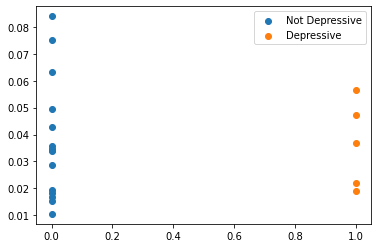

In [13]:
plot_features(0,4)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
# vectorizer = TfidfVectorizer()
# model = vectorizer.fit_transform(grouped_by_speaker_couple["hard_preprocessed"])
# model.toarray().shape
# vectorizer.get_feature_names()
# tf_idf_256 = model.toarray()

# iterations = 1
# components = 100
# scores = np.zeros((components, iterations))
# scores_dummy = np.zeros((components, iterations))
# scores_qda = np.zeros((components, iterations))

# for c in range(components):
#     for i in range(iterations):
#         x_train, x_test, y_train, y_test = train_test_split(tf_idf_256, labels, test_size=0.1)
#         pca = PCA(n_components=c+1)
#         qda = QuadraticDiscriminantAnalysis()
#         mlp_clf = MLPClassifier(max_iter=1000).fit((x_train), y_train)
#         dc = DummyClassifier(strategy="most_frequent")
#         dc.fit(x_train, y_train)
#         qda.fit(pca.fit_transform(x_train), y_train)
# #         print("---")
# #         print(f"p: {mlp_clf.predict(pca.transform(x_test))}")
# #         print(f"y_hat {y_test}")
# #         print("---")
#         scores[c, i] = score = mlp_clf.score(pca.transform(x_test), y_test)
#         scores_dummy[c,i] = score_dummy = dc.score(pca.transform(x_test), y_test)
#         scores_qda[c, i] = score_qda = qda.score(pca.transform(x_test), y_test)
#         print(score, score_dummy, score_qda)
        
# print(scores.mean(axis=1))
# print(scores_dummy.mean(axis=1))

In [16]:
# scores.mean(axis=1)
# scores_dummy.mean(axis=1)
# scores_qda.mean(axis=1)

In [17]:
# plt.plot(scores_qda.mean(axis=1))
# plt.plot(scores.mean(axis=1))
# plt.plot(scores_dummy.mean(axis=1))
# plt.legend(["QDA", "NN", "Dummy"])

In [18]:
# 1 - np.bincount(labels)[1] / np.bincount(labels)[0]

In [19]:
def squared(p):
    return p ** 2 + (1-p) ** 2

In [20]:
squared(0.67)

0.5578000000000001

In [21]:
import spacy
import liwc

In [22]:
parse, cat_names =liwc.load_token_parser("./data/German_LIWC2001_Dictionary.dic")

In [23]:
cat_names

['Pronoun',
 'I',
 'We',
 'Self',
 'You',
 'Other',
 'Negate',
 'Assent',
 'Article',
 'Preps',
 'Number',
 'Affect',
 'Posemo',
 'Posfeel',
 'Optim',
 'Negemo',
 'Anx',
 'Anger',
 'Sad',
 'Cogmech',
 'Cause',
 'Insight',
 'Discrep',
 'Inhib',
 'Tentat',
 'Certain',
 'Senses',
 'See',
 'Hear',
 'Feel',
 'Social',
 'Comm',
 'Othref',
 'Friends',
 'Family',
 'Humans',
 'Time',
 'Past',
 'Present',
 'Future',
 'Space',
 'Up',
 'Down',
 'Incl',
 'Excl',
 'Motion',
 'Occup',
 'School',
 'Job',
 'Achieve',
 'Leisure',
 'Home',
 'Sports',
 'TV',
 'Music',
 'Money',
 'Metaph',
 'Relig',
 'Death',
 'Physcal',
 'Body',
 'Sexual',
 'Eating',
 'Sleep',
 'Groom',
 'Swear',
 'Nonfl',
 'Fillers']

In [24]:
from spacy.tokens import Doc
from collections import Counter

def spacy_one_hot(doc):
    Doc.set_extension("liwc_one_hot", default={}, force=True)
    liwc_scores = dict.fromkeys(cat_names)
    liwc_counts = {**liwc_scores, **dict(Counter(category for token in doc if not token.is_punct for category in parse(token.text.lower())) )}
    liwc_counts = {key: item if item else 0 for key, item in liwc_counts.items()}
    doc._.liwc_one_hot = liwc_counts
    return doc

In [25]:
pipeline = spacy.load("de_core_news_md")
pipeline.add_pipe(spacy_one_hot)

def apply_pipeline(text):
    return pipeline(text)

documents = grouped_by_speaker_couple["soft_preprocessed"].apply(apply_pipeline)


In [26]:
liwc_one_hot_features = pd.DataFrame([doc._.liwc_one_hot for doc in documents])


liwc_one_hot_features_with_labels = liwc_one_hot_features.copy()
liwc_one_hot_features_with_labels["class"] = pd.Series(labels)
liwc_one_hot_features_with_labels.to_csv("liwc_one_hot_with_classes.csv")

In [27]:
pd.Series(labels)

0     False
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17     True
18    False
19    False
dtype: bool

In [28]:
labels.shape

(20,)

In [29]:
classes = pd.Series(labels)

pd.concat([classes, liwc_one_hot_features],names=["class"])

,0,Achieve,Affect,Anger,Anx,Article,Assent,Body,Cause,Certain,...,Social,Space,Sports,Swear,TV,Tentat,Time,Up,We,You
0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

In [31]:
x = liwc_one_hot_features
y = labels

In [32]:
classifiers = [CategoricalNB, ComplementNB, MultinomialNB, GaussianNB, BernoulliNB, DecisionTreeClassifier, MLPClassifier, DummyClassifier]

In [33]:
scores = np.zeros((len(classifiers), 10))
for index, classifier_class in enumerate(classifiers):
    print(classifier_class.__name__)
    kwargs = {}
    for i in range(10):
        
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
        if classifier_class.__name__ == "DummyClassifier":
            kwargs = {"strategy" : "stratified" }
        clf = classifier_class(**kwargs)
        clf.fit(x_train, y=y_train)
        try:
            score = clf.score(x_test,y_test)
            scores[index, i] = score
        except IndexError:
            scores[index, i] = 0
print(scores.mean(axis=1))   

CategoricalNB
ComplementNB
MultinomialNB
GaussianNB
BernoulliNB
DecisionTreeClassifier
MLPClassifier


c:\users\juliusdaub\pycharmprojects\python_playground\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\juliusdaub\pycharmprojects\python_playground\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\juliusdaub\pycharmprojects\python_playground\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


DummyClassifier
[0.         0.61666667 0.6        0.7        0.76666667 0.51666667
 0.7        0.6       ]


c:\users\juliusdaub\pycharmprojects\python_playground\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


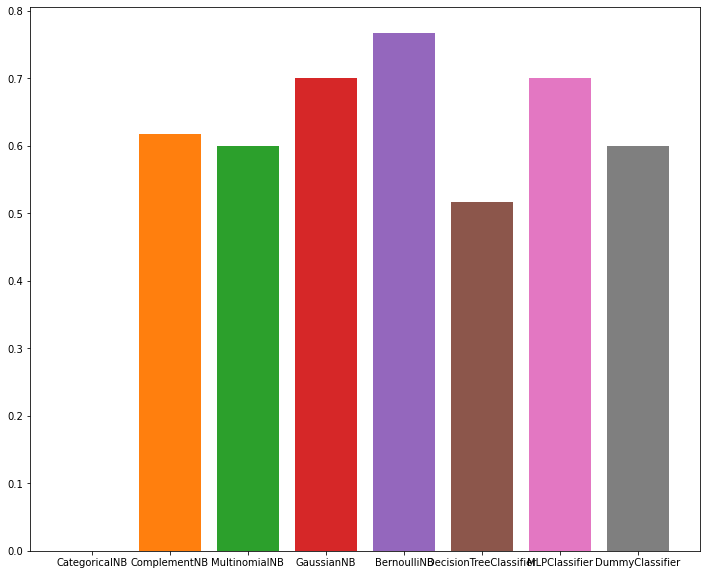

In [34]:
plt.figure(figsize=(12,10))
for clf, score in zip([classifier.__name__ for classifier in classifiers], scores.mean(axis=1)):
    plt.bar(clf, score)
    


In [35]:
liwc_one_hot_features_with_labels

,Pronoun,I,We,Self,You,Other,Negate,Assent,Article,Preps,...,Physcal,Body,Sexual,Eating,Sleep,Groom,Swear,Nonfl,Fillers,class
0,103,46,16,62,30,9,14,17,24,17,...,4,1,2,1,0,0,0,0,0,False
1,106,53,11,64,28,12,12,19,29,22,...,11,0,10,0,1,1,0,0,0,True
2,35,18,4,22,10,3,8,22,17,10,...,2,0,0,0,0,2,0,1,0,False
3,156,80,7,87,38,28,19,22,103,52,...,6,3,0,2,1,1,1,0,0,False
4,31,17,4,21,9,1,7,11,23,15,...,5,0,0,4,1,0,0,0,0,False
5,68,32,10,42,12,11,13,22,16,16,...,0,0,0,0,0,0,1,0,0,True
6,70,34,10,44,21,5,8,7,18,21,...,4,1,0,3,0,0,0,0,0,False
7,119,63,18,81,26,12,16,11,62,47,...,3,1,0,1,0,1,1,1,0,False
8,139,56,15,71,59,8,22,22,60,48,...,8,5,1,2,0,0,0,0,0,True
9,48,23,6,29,12,7,12,19,34,16,...,2,1,0,0,1,0,0,4,0,False


0
1
2
3
4
5
6
7
8
9
0.6166666666666667
0.25
0.16666666666666669


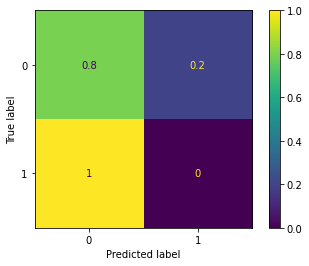

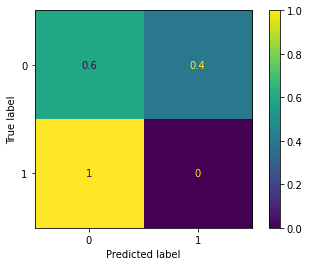

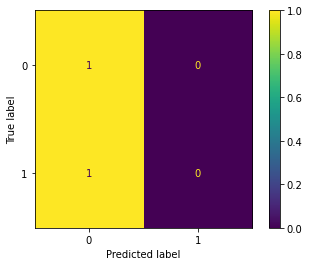

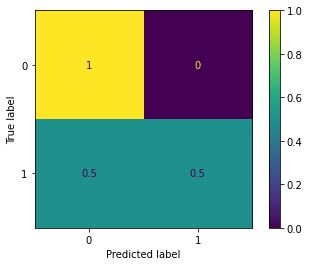

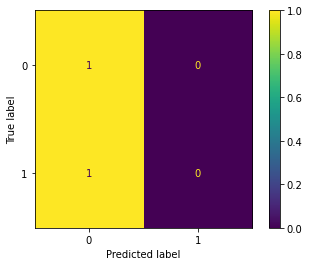

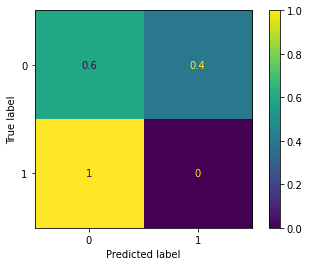

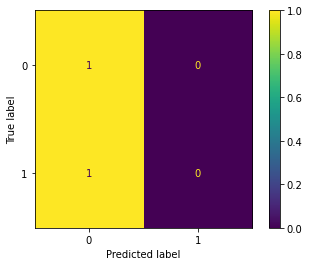

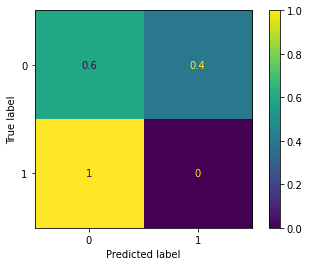

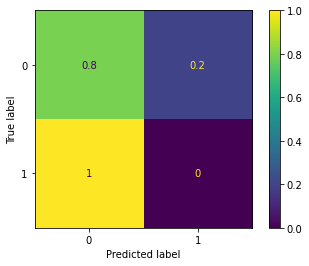

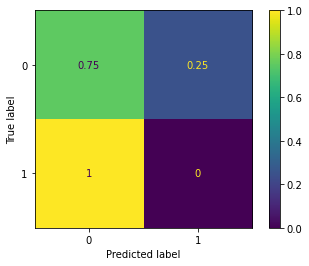

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2
x = liwc_one_hot_features.to_numpy()
y = labels

x_true = x[y]
y_true = labels[labels]
iterations = 10
scores = np.zeros(iterations)
means = np.zeros(iterations)
actual_means = np.zeros(iterations)
x_best_indices = SelectKBest(chi2, k=40).fit(x,y).get_support(True)
for i in range(iterations):
    print(i)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
    
#     y_test = y_true/
#     x_test = x_true
    clf = MLPClassifier(max_iter=10000)
#     clf = MultinomialNB()
#     clf = DummyClassifier(strategy="stratified")
    clf.fit(x_train[:,x_best_indices], y_train)
    means[i] = clf.predict(x_test[:,x_best_indices]).mean()
    actual_means[i] = y_test.mean()
    scores[i] = clf.score(x_test[:,x_best_indices], y_test)
    preds = clf.predict(x_test[:,x_best_indices])
    ConfusionMatrixDisplay(confusion_matrix(y_test, preds, normalize='true', labels=clf.classes_)).plot()
print(scores.mean())
print(actual_means.mean())
print(means.mean())

In [37]:
preds

array([False, False,  True,  True,  True])

In [38]:
y_test[y_test]

array([ True,  True,  True,  True,  True])

In [105]:
def syll_count(doc):
    Doc.set_extension("syll_count", default = 0, force=True)
    tokens = [token.text for token in doc if not token.is_punct and token.is_alpha]
    syll_count = 0
    for word in tokens:
        inserted = dic.inserted(word)
        syll_count += (len(inserted.split("-")))
    doc._.syll_count = syll_count
    return doc

def word_count(doc):
    Doc.set_extension("word_count", default = 0, force=True)
    tokens = [token.text for token in doc if not token.is_punct and token.is_alpha]
    word_count = 0
    for word in tokens:
        word_count += 1
    doc._.word_count = word_count
    return doc

def syll_per_word(doc):
    Doc.set_extension("syll_per_word", default = 0, force=True)
    doc._.syll_per_word = doc._.syll_count / doc._.word_count
    return doc

def flesh_reading_score(doc):
    Doc.set_extension("flesh_score", default = 0, force=True)
    asl = doc._.word_count / len(list(doc.sents))
    asw = doc._.syll_count / doc._.word_count
    doc._.flesh_score = 180 - asl - (58.5 * asw )
    return doc

def component_without_stopwords(doc):
    Doc.set_extension("component_without_stopwords", default = 0, force=True)
    without_stopwords = [token for token in doc if not token.is_stop and not token.is_punct]
    doc._.component_without_stopwords = without_stopwords
    return doc

def using_no_stopwords(doc):
    print(doc._.component_without_stopwords)
    return doc

In [106]:
import pyphen
nlp = spacy.load("de_core_news_md")
nlp.add_pipe(word_count)
nlp.add_pipe(syll_count)
nlp.add_pipe(syll_per_word)
nlp.add_pipe(flesh_reading_score)
nlp.add_pipe(component_without_stopwrds)
nlp.add_pipe(using_no_stopwords)
dic = pyphen.Pyphen(lang='de')
satz = 'Alle meine Entchen schwimmen auf dem See, Köpfchen unters Wasser, Schwänzchen in die Höh'
doc = nlp(satz)


[Entchen, schwimmen, See, Köpfchen, unters, Wasser, Schwänzchen, Höh]


In [101]:
print(doc._.word_count, doc._.syll_count, doc._.syll_per_word, doc._.flesh_score)
# print(doc._.component_without_stopwords)

14 22 1.5714285714285714 74.07142857142857
[Entchen, schwimmen, See, Köpfchen, unters, Wasser, Schwänzchen, Höh]


In [ ]:
def build_features
documents = grouped_by_speaker_couple["soft_preprocessed"].apply(apply_pipeline)